In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import sklearn
from sklearn.neighbors import KernelDensity

# 2(a)

In [2]:
# Loading data
df = pd.read_csv('hour.csv')

In [3]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [4]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
#remove outliers

In [6]:
def find_outliers(x):
    Q1=np.percentile(x,25)
    Q3=np.percentile(x,75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    outlier_ind=list(x.index[(x<lower)|(x>upper)])
    outlier_value=list(x[outlier_ind])
    return outlier_ind,outlier_value

In [7]:
find_outliers(df['temp'])[0]
df=df.drop(find_outliers(df['temp'])[0],axis=0)

In [8]:
find_outliers(df['atemp'])[0]
df_2012=df.drop(find_outliers(df['temp'])[0],axis=0)

In [9]:
find_outliers(df['hum'])[0]
df_2012=df.drop(find_outliers(df['temp'])[0],axis=0)

In [10]:
find_outliers(df['windspeed'])[0]
df_2012=df.drop(find_outliers(df['temp'])[0],axis=0)

In [11]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


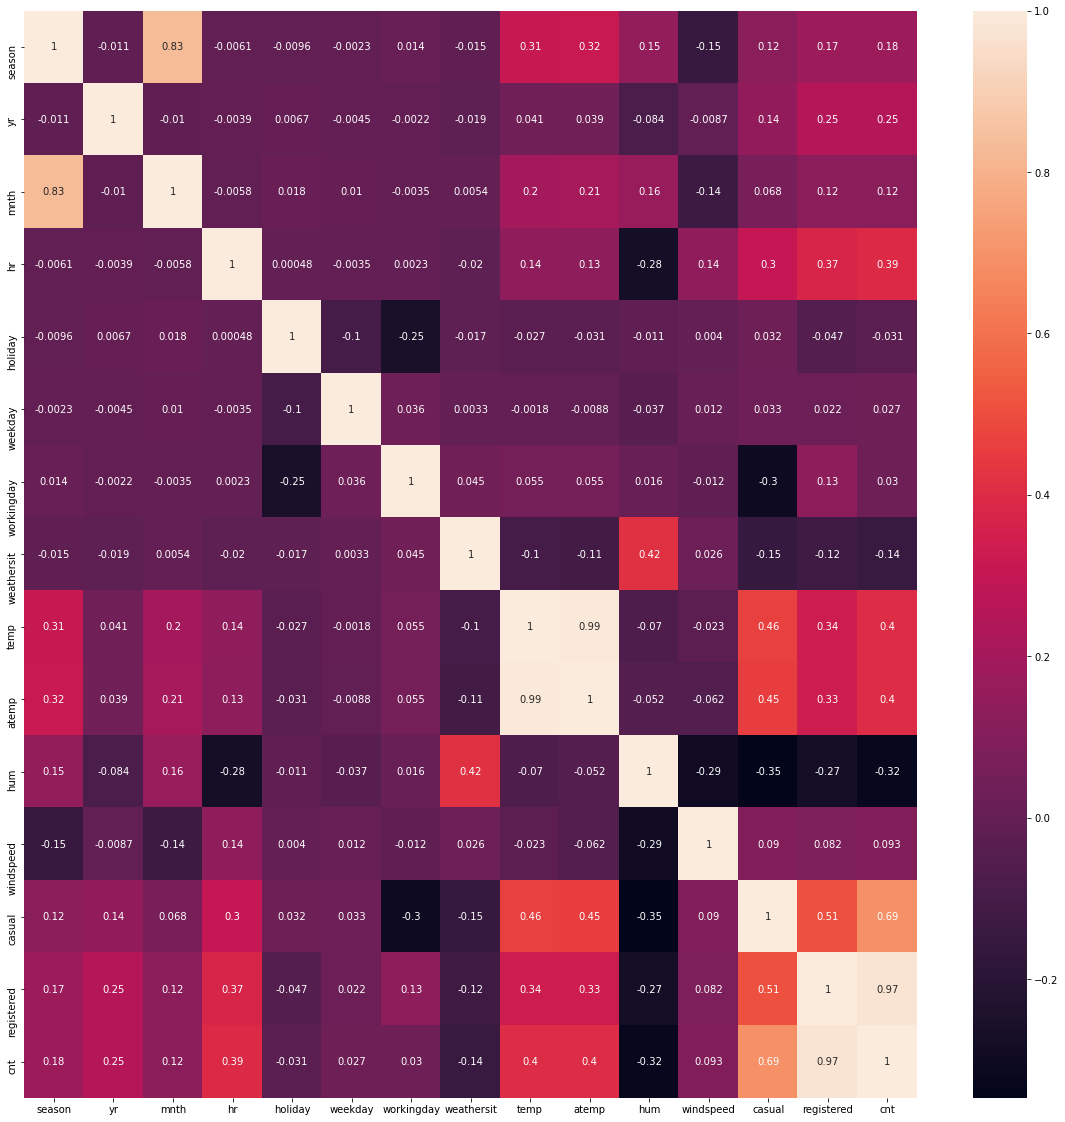

In [12]:
#correlation matrix
import seaborn as sns
corr_data =df.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]

cor_mat=corr_data.corr()

fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(cor_mat,annot = True)

plt.show()

In [13]:
#feature selected
df_pre=df[['season','yr','hr','weathersit','temp','hum','windspeed','holiday','weekday','workingday','cnt']]

In [14]:
df_pre

,season,yr,hr,weathersit,temp,hum,windspeed,holiday,weekday,workingday,cnt
0,1,0,0,1,0.24,0.81,0.0000,0,6,0,16
1,1,0,1,1,0.22,0.80,0.0000,0,6,0,40
2,1,0,2,1,0.22,0.80,0.0000,0,6,0,32
3,1,0,3,1,0.24,0.75,0.0000,0,6,0,13
4,1,0,4,1,0.24,0.75,0.0000,0,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,19,2,0.26,0.60,0.1642,0,1,1,119
17375,1,1,20,2,0.26,0.60,0.1642,0,1,1,89
17376,1,1,21,1,0.26,0.60,0.1642,0,1,1,90
17377,1,1,22,1,0.26,0.56,0.1343,0,1,1,61


In [15]:
X=df_pre.iloc[:,:-1]

In [16]:
y=df_pre.iloc[:,-1]

In [17]:
#create dummy variable

In [18]:
X_mod = pd.get_dummies(X, columns=['weathersit'])

In [19]:
X_mod = pd.get_dummies(X_mod, columns=['hr'])

In [20]:
X_mod = pd.get_dummies(X_mod, columns=['season'])

In [21]:
X_mod = pd.get_dummies(X_mod, columns=['weekday'])

In [22]:
X_mod.columns

Index(['yr', 'temp', 'hum', 'windspeed', 'holiday', 'workingday',
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4', 'hr_0',
       'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9',
       'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17',
       'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'season_1',
       'season_2', 'season_3', 'season_4', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [23]:
X_ANN=X_mod.iloc[:,[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
                                  ,35,36,37,38,39,40,41,42,43,44]]
y_ANN=y

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [25]:
#splitting into fit and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_ANN, y_ANN, test_size = 0.3, random_state = 0)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [28]:
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor(random_state=0,max_iter=3000).fit(X_train,y_train)
y_pred_relu=mlp.predict(X_test)
y_pred_relu_train=mlp.predict(X_train)

RMSE= sqrt(mean_squared_error(y_test, y_pred_relu))

print('Accuracy on training set: {:.2f}'.format(mlp.score(X_train,y_train)))
print('Accuracy on test set: {:.2f}'.format(mlp.score(X_test,y_test)))
print('RMSE for testing data',RMSE)

Accuracy on training set: 0.96
Accuracy on test set: 0.94
RMSE for testing data 45.19573007489058


In [29]:
#draw actual vs predicted for a sample data

In [30]:
X_ANN2 = np.array(df.drop(['cnt'],1))
Y_ANN2= np.array(df['cnt'])
X_train_ANN2,X_test_ANN2, y_train_ANN2, y_test_ANN2= train_test_split(X_ANN2, Y_ANN2, test_size=0.3, random_state=0)

In [31]:
y_test_dates=[]
for row in range(len(y_test_ANN2)):
    time=X_test_ANN2[row,1]+' hr:'+str(X_test_ANN2[row,5])
    y_test_dates.append(time)

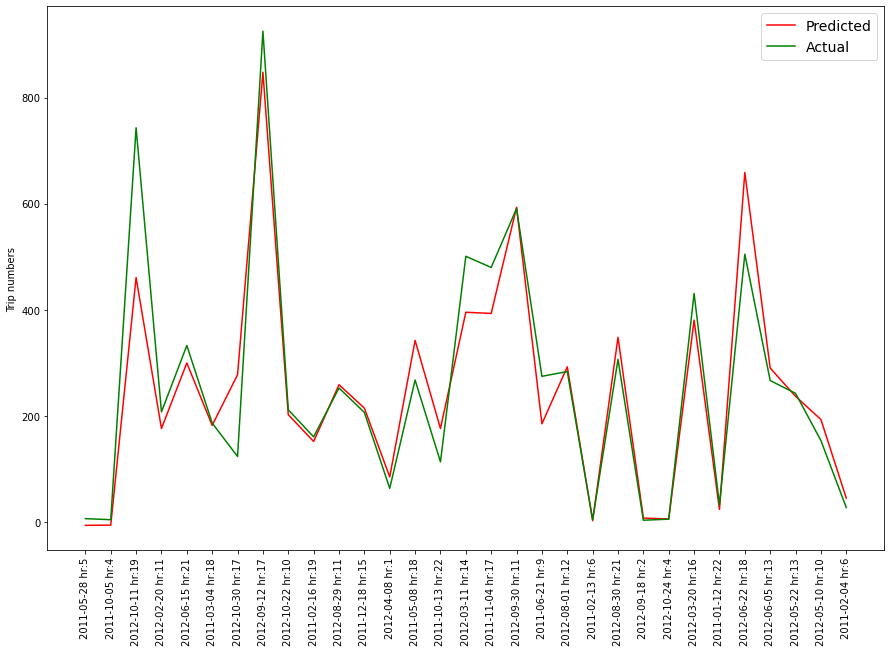

In [32]:
from matplotlib import rcParams
predicted_relu=np.array(y_pred_relu[0:31]) 
actual=np.array(y_test[0:31])
plt.figure(figsize=(15,10))
predict_rbf,=plt.plot(y_test_dates[0:31],predicted_relu,label="Predicted",color="red")
actual_rbf,=plt.plot(y_test_dates[0:31],actual,label="Actual",color="green")
plt.legend([predict_rbf,actual_rbf],['Predicted','Actual'],fontsize=14)
plt.ylabel("Trip numbers")
plt.xticks(rotation=90)
rcParams['font.family'] = 'Times New Roman'
rcParams.update({'font.size': 14})
plt.show()

# 2(b)
      

In [33]:
#preparing data for predicting next hour demand
df_nh= pd.read_csv("hour.csv",parse_dates=['dteday'])
df_nh_sorted= df_nh.sort_values(by=['dteday','hr'])

#add an extra columns
df_nh_sorted['nxt_hr_cnt']= df_nh_sorted['cnt'].shift(-1)
df_nh=df_nh_sorted.dropna()
df_nh.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,nxt_hr_cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,40.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,32.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,13.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1.0


In [34]:
df_pre_nh=df_nh[['season','yr','hr','weathersit','temp','hum','windspeed',
              'holiday','weekday','workingday','nxt_hr_cnt']]

In [35]:
df_pre_nh

,season,yr,hr,weathersit,temp,hum,windspeed,holiday,weekday,workingday,nxt_hr_cnt
0,1,0,0,1,0.24,0.81,0.0000,0,6,0,40.0
1,1,0,1,1,0.22,0.80,0.0000,0,6,0,32.0
2,1,0,2,1,0.22,0.80,0.0000,0,6,0,13.0
3,1,0,3,1,0.24,0.75,0.0000,0,6,0,1.0
4,1,0,4,1,0.24,0.75,0.0000,0,6,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
17373,1,1,18,2,0.26,0.48,0.1343,0,1,1,119.0
17374,1,1,19,2,0.26,0.60,0.1642,0,1,1,89.0
17375,1,1,20,2,0.26,0.60,0.1642,0,1,1,90.0
17376,1,1,21,1,0.26,0.60,0.1642,0,1,1,61.0


In [36]:
X_nh=df_pre_nh.iloc[:,:-1]

y_nh=df_pre_nh.iloc[:,-1]

#create dummy variables
X_mod_nh = pd.get_dummies(X_nh, columns=['weathersit'])

X_mod_nh = pd.get_dummies(X_mod_nh, columns=['hr'])

X_mod_nh = pd.get_dummies(X_mod_nh, columns=['season'])

X_mod_nh = pd.get_dummies(X_mod_nh, columns=['weekday'])

In [37]:
X_mod_nh.columns

Index(['yr', 'temp', 'hum', 'windspeed', 'holiday', 'workingday',
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4', 'hr_0',
       'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9',
       'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17',
       'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'season_1',
       'season_2', 'season_3', 'season_4', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [38]:
X_ANN_nh=X_mod_nh.iloc[:,[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
                                  ,35,36,37,38,39,40,41,42,43,44]]
y_ANN_nh=y_nh


#splitting into fit and test data
from sklearn.model_selection import train_test_split
X_train_nh, X_test_nh, y_train_nh, y_test_nh= train_test_split(X_ANN_nh, y_ANN_nh, test_size = 0.3, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_nh = sc.fit_transform(X_train_nh)
X_test_nh = sc.transform(X_test_nh)

In [39]:
#fit the model
from sklearn.neural_network import MLPRegressor
mlp_nh=MLPRegressor(random_state=0,max_iter=3000).fit(X_train_nh,y_train_nh)
y_pred_relu_nh_test=mlp_nh.predict(X_test_nh)
y_pred_relu_nh_train=mlp_nh.predict(X_train_nh)
RMSE_nh_test= sqrt(mean_squared_error(y_test_nh, y_pred_relu_nh_test))
RMSE_nh_train= sqrt(mean_squared_error(y_train_nh, y_pred_relu_nh_train))
print('Accuracy on training set: {:.2f}'.format(mlp_nh.score(X_train_nh,y_train_nh)))
print('Accuracy on test set for next hour: {:.2f}'.format(mlp_nh.score(X_test_nh,y_test_nh)))
print('RMSE for testing data for next hour',RMSE_nh_test)


Accuracy on training set: 0.96
Accuracy on test set for next hour: 0.94
RMSE for testing data for next hour 43.75375567043937


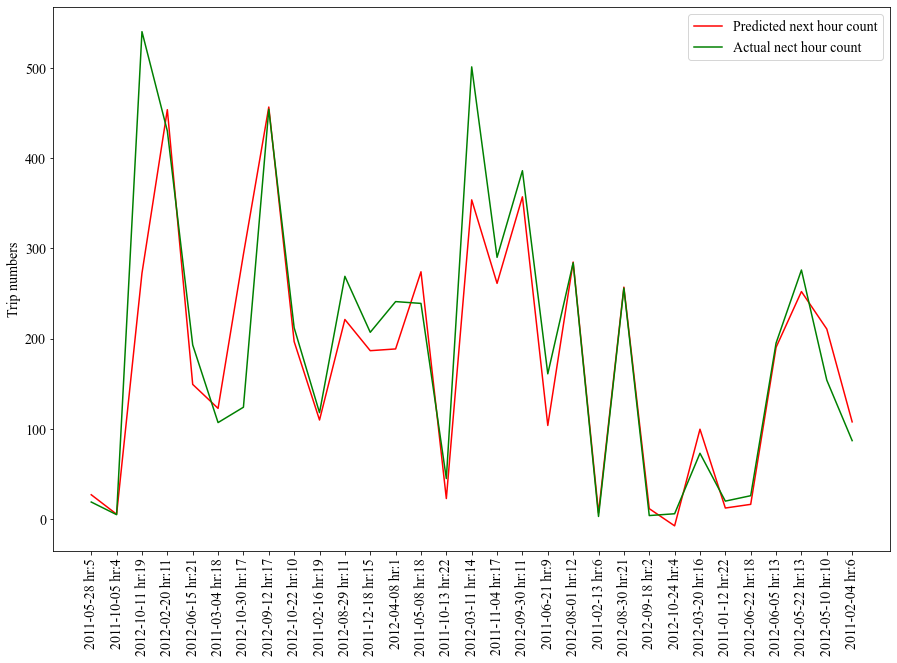

In [40]:
from matplotlib import rcParams

#predicted_relu=np.array(y_pred_relu[0:31])
predicted_relu_nh_test=np.array(y_pred_relu_nh_test[0:31])

actual_nh=np.array(y_test_nh[0:31]) 
plt.figure(figsize=(15,10))

#predict_relu,=plt.plot(y_test_dates[0:31],predicted_relu,label="Predicted next hour",color="blue")
predict_relu_nh,=plt.plot(y_test_dates[0:31],predicted_relu_nh_test,label="Predicted: next hour",color="red")
actual_relu_nh,=plt.plot(y_test_dates[0:31],actual_nh,label="Actual demand: next hour ",color="green")
plt.legend([predict_relu_nh,actual_relu_nh],['Predicted next hour count','Actual nect hour count'],fontsize=14)
plt.ylabel("Trip numbers")
plt.xticks(rotation=90)
rcParams['font.family'] = 'Times New Roman'
rcParams.update({'font.size': 14})
plt.show()

# 2(c)

In [46]:
# create different layer and activation function 
layers=[[100],[100,100],[100,100,100],[100,100,100,100]]
act_functions=['logistic', 'tanh', 'relu']

In [48]:
score_dict={}
for fn in act_functions:
    for i in range(len(layers)):
        print('working on %s of layer %s'%(fn,str(i)))
        from sklearn.neural_network import MLPRegressor
        mlp=MLPRegressor(hidden_layer_sizes=layers[i],activation=fn,random_state=0,max_iter=150).fit(X_train_nh,y_train_nh)
        y_pred_nh =mlp.predict(X_test_nh)
        train_score=mlp.score(X_train_nh,y_train_nh)
        test_score=mlp.score(X_test_nh,y_test_nh)
        RMSE= sqrt(mean_squared_error(y_test_nh, y_pred_nh))
        
        if fn not in score_dict:
            score_dict[fn]=[[train_score],[test_score],[RMSE]]
        else:
            score_dict[fn][0].append(train_score)
            score_dict[fn][1].append(test_score)
            score_dict[fn][2].append(RMSE)
        
        print('Accuracy on training set: {:.2f}'.format(train_score))
        print('Accuracy on test set: {:.2f}'.format(test_score))
        print('RMSE',RMSE)

working on logistic of layer 0


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on training set: 0.84
Accuracy on test set: 0.83
RMSE 73.79923319516324
working on logistic of layer 1


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on training set: 0.90
Accuracy on test set: 0.88
RMSE 63.85841539213261
working on logistic of layer 2


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on training set: 0.89
Accuracy on test set: 0.86
RMSE 66.86052519719047
working on logistic of layer 3


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on training set: 0.90
Accuracy on test set: 0.88
RMSE 61.83705656930691
working on tanh of layer 0


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on training set: 0.93
Accuracy on test set: 0.91
RMSE 53.65453680560224
working on tanh of layer 1


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on training set: 0.95
Accuracy on test set: 0.91
RMSE 54.7508053742103
working on tanh of layer 2


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on training set: 0.96
Accuracy on test set: 0.90
RMSE 56.644998853400516
working on tanh of layer 3


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on training set: 0.96
Accuracy on test set: 0.90
RMSE 57.406550227883045
working on relu of layer 0


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on training set: 0.93
Accuracy on test set: 0.93
RMSE 48.97990751687992
working on relu of layer 1


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on training set: 0.96
Accuracy on test set: 0.94
RMSE 44.313459869009186
working on relu of layer 2


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on training set: 0.97
Accuracy on test set: 0.94
RMSE 45.52358387651044
working on relu of layer 3


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on training set: 0.98
Accuracy on test set: 0.93
RMSE 48.9461525308315


<ipython-input-49-9216d7b33e1e>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


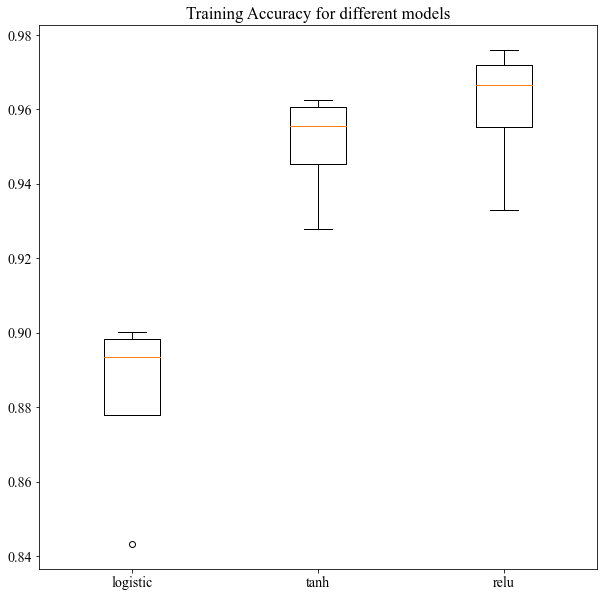

In [49]:
results=[]
for fn in score_dict:
    results.append(score_dict[fn][0])
names=list(score_dict.keys())
fig = plt.figure(figsize=(10,10))
plt.title('Training Accuracy for different models')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<ipython-input-50-3fae7ae9e54e>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


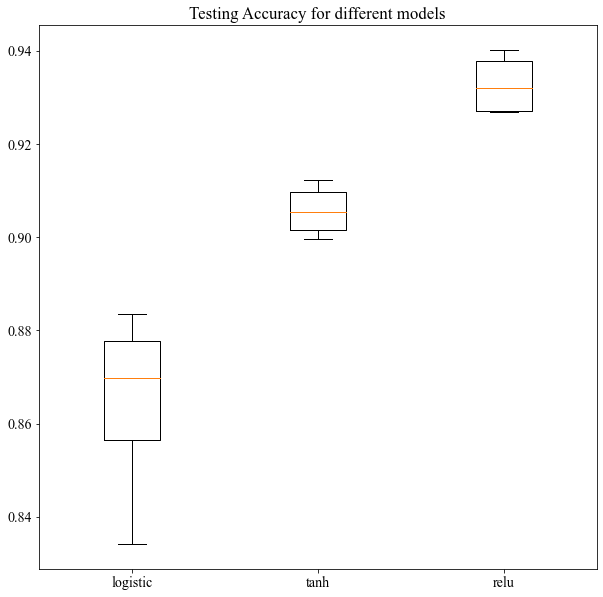

In [50]:
results=[]
for fn in score_dict:
    results.append(score_dict[fn][1])
names=list(score_dict.keys())
fig = plt.figure(figsize=(10,10))
plt.title('Testing Accuracy for different models')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<ipython-input-51-b38dc957949f>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


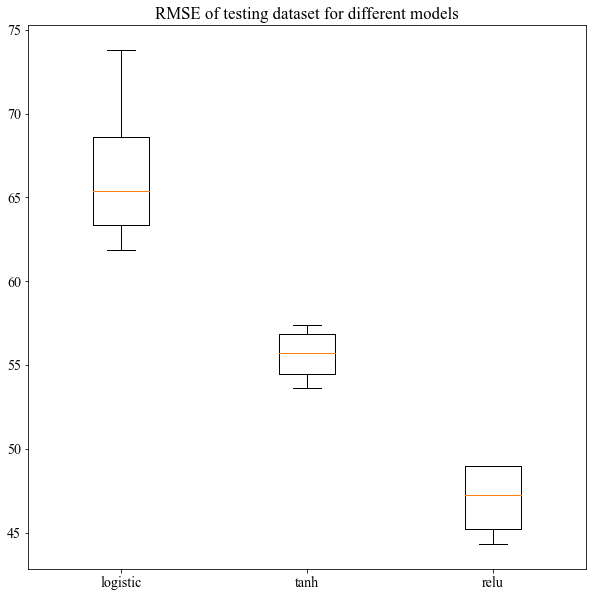

In [51]:
results=[]
for fn in score_dict:
    results.append(score_dict[fn][2])
names=list(score_dict.keys())
fig = plt.figure(figsize=(10,10))
plt.title('RMSE of testing dataset for different models')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()